## House Price Predicction Model


**Importing Necessary Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#Library to Generate Train and Test data.
from sklearn.model_selection import train_test_split as tts
#Library to Perform Linear Regression.
import statsmodels.api as sm
#Libraries for Performance Assesment
from sklearn.metrics import mean_squared_error as MSR
from sklearn.metrics import r2_score as R2
import warnings
warnings.filterwarnings('ignore')

**Reading the CSV file**

In [5]:
df=pd.read_csv('Housing.csv')

**Visualising Data**

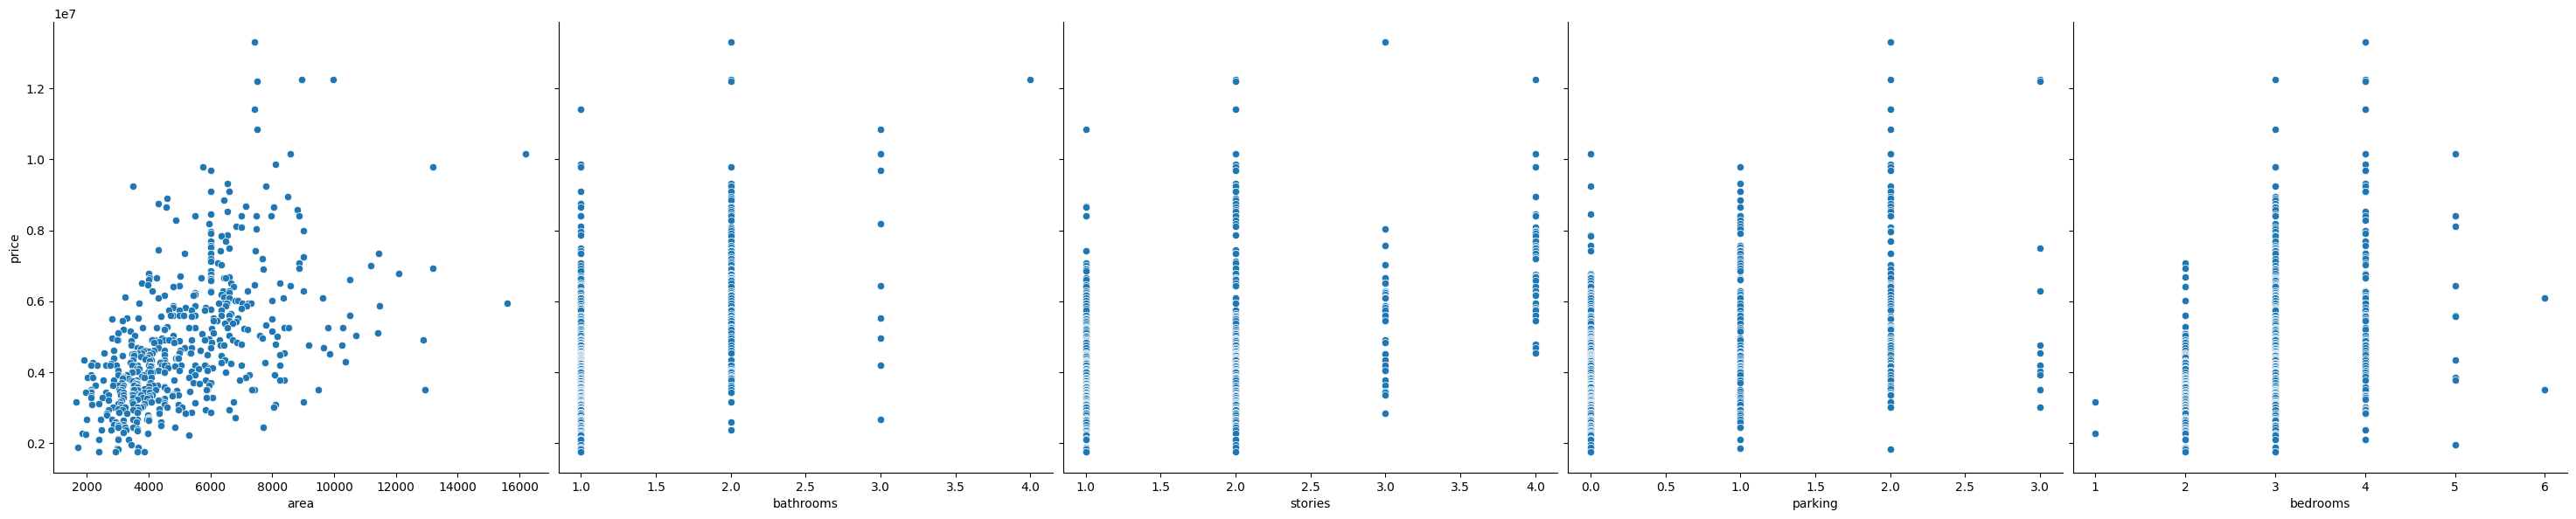

In [6]:
sns.pairplot(df,x_vars=['area','bathrooms','stories','parking','bedrooms'],y_vars=['price'],size=6,kind='scatter')


**Generating Pairwise Correlations Matrix to determine the Appropriate Independent Variable**

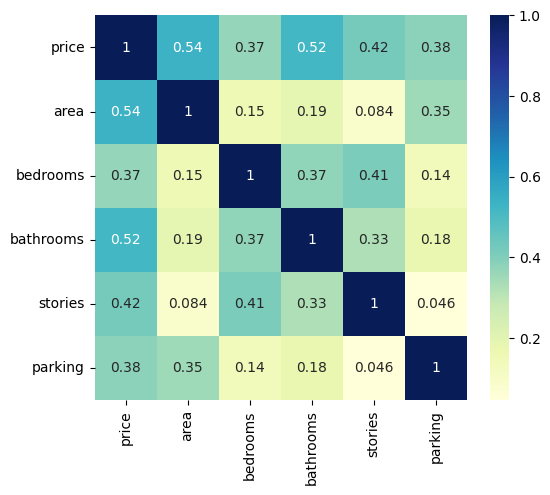

In [7]:
Housing_data=df.select_dtypes(include=['number'])
plt.figure(figsize=(6,5))
sns.heatmap(Housing_data.corr(), cmap='YlGnBu',annot=True)
plt.show()

*According the Correlation Matrix 'price' and 'area' have the Highest Correlation, So our Independent Variable is 'area'.*

**Setting Independent and Dependent Variable and Generating Train and Test Data.**

In [8]:
X=df['area']
Y=df['price']
X_train,X_test,Y_train,Y_test=tts(X,Y,test_size=0.2,random_state=46)
print(X_train,X_test,Y_train,Y_test,sep="\n\n")

473     8050
287     5500
112     4300
172     8400
336     8080
       ...  
316     5900
403    12944
442     2684
372     3180
189     3540
Name: area, Length: 436, dtype: int64

247     8400
10     13200
105     4500
338     3780
537     1700
       ...  
503     4000
135     6000
304     8250
385     3640
529     3970
Name: area, Length: 109, dtype: int64

473    3003000
287    4200000
112    6083000
172    5250000
336    3920000
        ...   
316    4060000
403    3500000
442    3220000
372    3640000
189    5040000
Name: price, Length: 436, dtype: int64

247    4550000
10     9800000
105    6160000
338    3885000
537    1890000
        ...   
503    2660000
135    5775000
304    4193000
385    3570000
529    2275000
Name: price, Length: 109, dtype: int64


**Performing Linear Regression**

In [9]:
X_train_sm=sm.add_constant(X_train)
print(X_train_sm)
linearRegression=sm.OLS(Y_train,X_train_sm).fit()

     const   area
473    1.0   8050
287    1.0   5500
112    1.0   4300
172    1.0   8400
336    1.0   8080
..     ...    ...
316    1.0   5900
403    1.0  12944
442    1.0   2684
372    1.0   3180
189    1.0   3540

[436 rows x 2 columns]


**Results of the Regression Analysis**

In [10]:
m=linearRegression.params['area']
b=linearRegression.params['const']
print(linearRegression.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     175.2
Date:                Mon, 09 Dec 2024   Prob (F-statistic):           7.89e-34
Time:                        07:08:07   Log-Likelihood:                -6848.8
No. Observations:                 436   AIC:                         1.370e+04
Df Residuals:                     434   BIC:                         1.371e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.339e+06      2e+05     11.680      0.0

**Generating the Predicted Values**

In [11]:
X_test_sm=sm.add_constant(X_test)
Y_predicted=linearRegression.predict(X_test_sm)
print(Y_predicted)

247    6.335968e+06
10     8.619776e+06
105    4.480374e+06
338    4.137803e+06
537    3.148153e+06
           ...     
503    4.242478e+06
135    5.194064e+06
304    6.264599e+06
385    4.071192e+06
529    4.228204e+06
Length: 109, dtype: float64


**Evaluating the Performance**

In [12]:
print("Residual Mean Squared Error: ",np.sqrt(MSR(Y_test,Y_predicted)))
print("R-Squared                  : ",R2(Y_test,Y_predicted))

Residual Mean Squared Error:  1460522.226857372
R-Squared                  :  0.2817763154271622


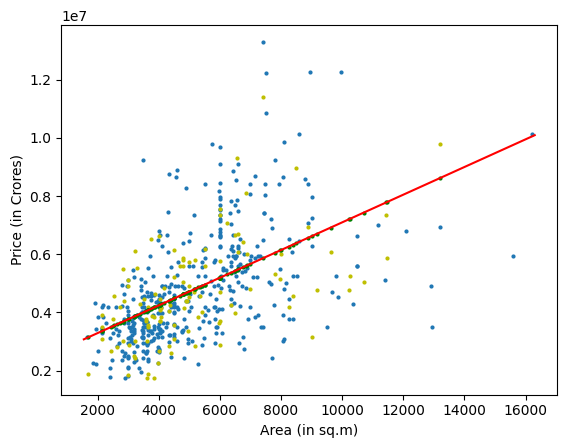

<Figure size 2400x2400 with 0 Axes>



Blue Dots are Training Data
Yellow Dots are Test Data
Green Dots are Predicted data


In [14]:
max_X=X_train.max()
min_X=X_train.min()
plt.scatter(X_train,Y_train,s=4)
plt.xlabel('Area (in sq.m)')
plt.ylabel('Price (in Crores)')
plt.scatter(X_test,Y_test,c='y',s=4)
plt.scatter(X_test,Y_predicted,c='g',s=4)
plt.plot(list(range(min_X-100,max_X+100)),[m*(X_train)+b for X_train in range(min_X-100,max_X+100)],'r')
plt.figure(figsize=(24,24))
plt.show()
print("\n\nBlue Dots are Training Data\nYellow Dots are Test Data\nGreen Dots are Predicted data")